In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from datetime import timedelta
from datetime import datetime

import seaborn as sns

from finances.investment.tools.assets_data import AssetsData

% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('dark')

In [3]:
sys.path.append('C:\\projects\\finances.git')

In [20]:
data_path = 'C:\\projects\\finances.git\\finances\\investment'
data = pd.read_csv(os.path.join(data_path, 'data_test_small.csv'), index_col=['symbol', 'date'])

In [21]:
assets = AssetsData(stock_data=data)

In [22]:
df = assets.cumm_returns
df.head()
df.index = pd.to_datetime(df.index)

In [23]:
t_estimation = 500
t_horizon = 500
estimation_df = df.rolling(t_estimation).mean().dropna()
horizon_df = df.iloc[::-1].rolling(t_horizon).mean().iloc[::-1]

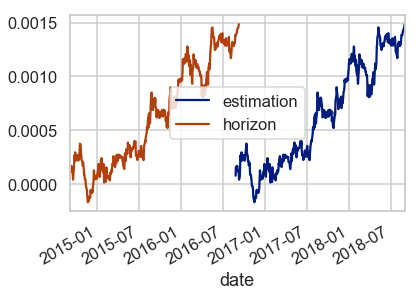

In [24]:
estimation_df['AAPL'].plot(label='estimation')
horizon_df['AAPL'].plot(label='horizon')
plt.legend()

In [25]:
t_horizon = 253
fom_list = []
fom_df = pd.DataFrame()
estimation_range = np.arange(t_horizon,1000,25)
for t_estimation in estimation_range:
    estimation_df = df.rolling(t_estimation).mean().dropna()
    horizon_df = df.iloc[::-1].rolling(t_horizon).mean().iloc[::-1]
    diff_df = abs(estimation_df-horizon_df).dropna()*100
    fom_df[t_estimation] = diff_df.mean()

fom_df=fom_df.T

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195E94F9080>,
      dtype=object)

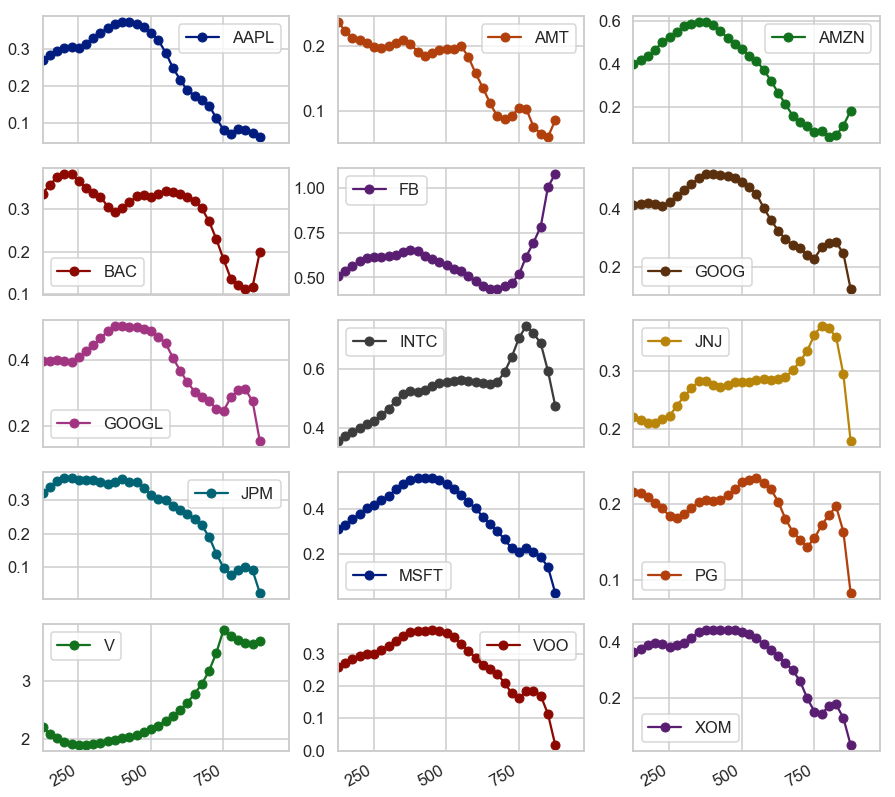

In [26]:
fom_df.plot(style='-o', subplots=True, layout=(5,3), figsize=(15,15))

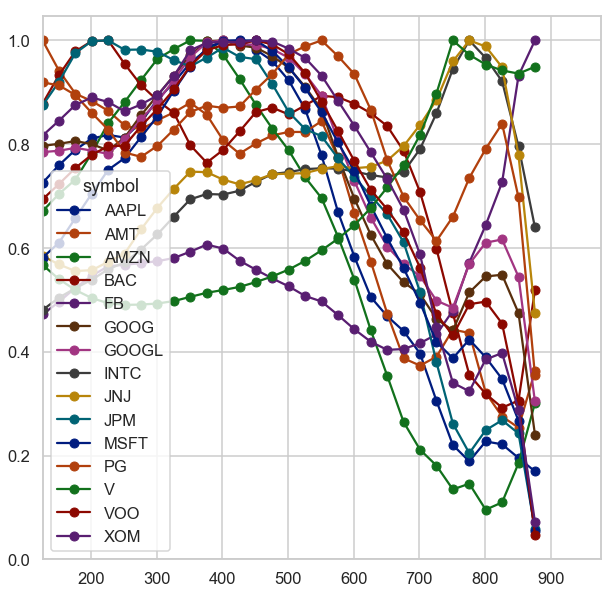

In [27]:
normalized= fom_df/fom_df.max()
normalized.plot(style='-o', figsize=(10,10))

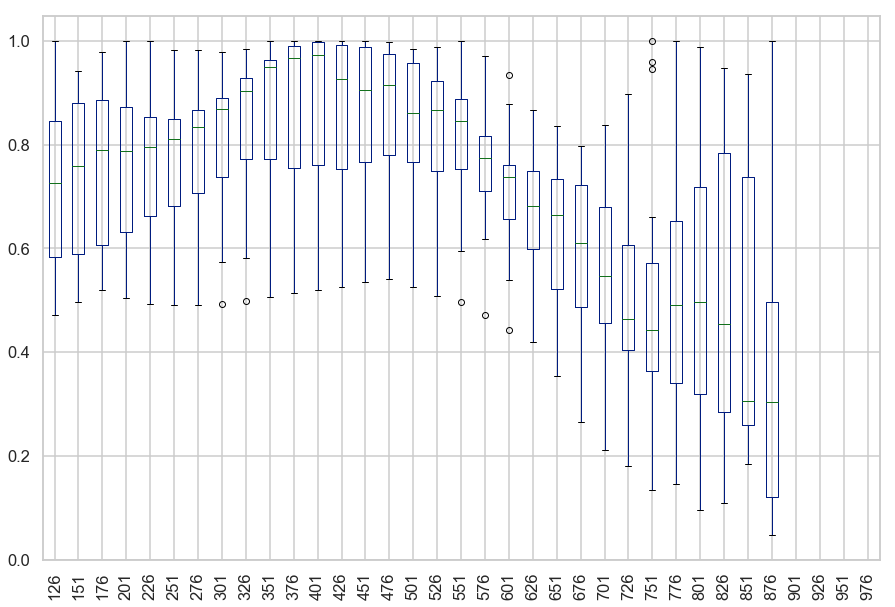

In [28]:
normalized.T.boxplot(rot=90, figsize=(15,10))